# High dimensional synthetic data generation

In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Projection on a sphere

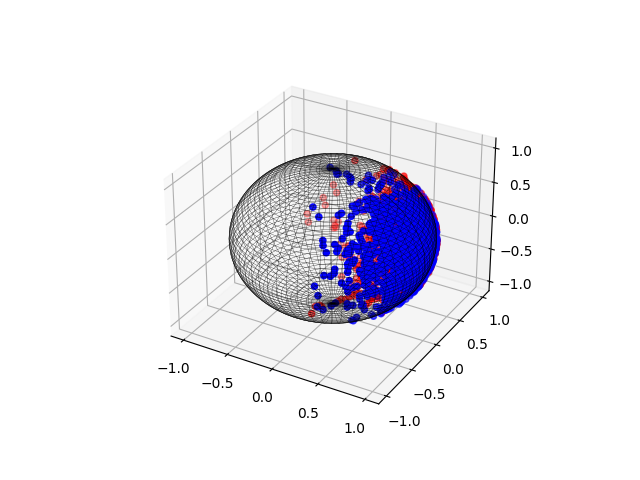

In [3]:

# sigma, theta = np.mgrid[0:2*np.pi, 0:np.pi]
u = np.linspace(0, np.pi, 60)
v = np.linspace(0, 2*np.pi, 60)
# A = np.random.uniform(0, np.pi, 10)
# B = np.random.uniform(0, 2*np.pi, 10)
A = np.random.normal(2, 0.4,1000)
B = np.random.normal(1, 0.4,1000)

# A = np.clip(A,0,np.pi)
# B = np.clip(B,0,2*np.pi)

C = np.random.normal(5, 0.4,1000)
D = np.random.normal(3, 0.4,1000) 


x = np.outer(np.sin(u) , np.cos(v))
#x = np.sin(u) * np.cos(v)
y = np.outer(np.sin(u) , np.sin(v))
#y = np.sin(u) * np.sin(v)
z = np.outer(np.cos(u) , np.ones_like(v))
#z = np.cos(u)

x1 = np.sin(A) * np.cos(B)
y1 = np.sin(A) * np.sin(B)
z1 = np.cos(A)

x2 = np.sin(C) * np.cos(D)
y2 = np.sin(C) * np.sin(D)
z2 = np.cos(C)

fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.plot_surface(x, y, z, label='Unit sphere')
ax.plot_wireframe(x, y, z, color='k', rstride=1, cstride=1, linewidths = 0.2)
ax.scatter(x1,y1,z1, c='r')
ax.scatter(x2,y2,z2, c='b')

Projection on a swiss roll

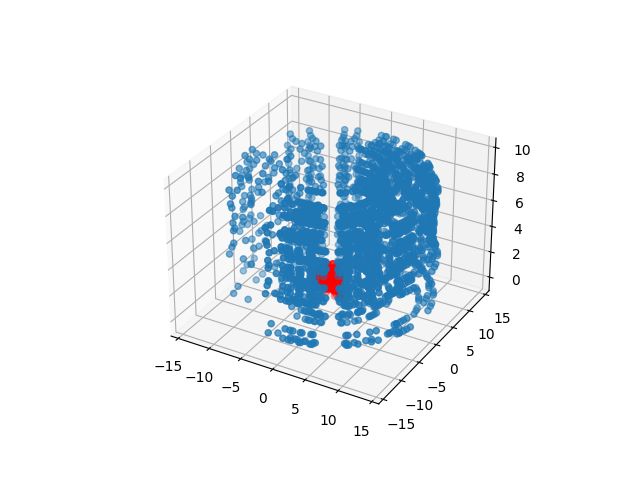

In [29]:
phi = np.random.uniform(1.5*np.pi, 4.5*np.pi,50)
sigma = np.random.uniform(0,10,50)

x = np.outer(phi,np.cos(phi))
y = np.outer(phi,np.sin(phi))
z = np.outer(sigma,np.ones_like(phi))

A = np.random.normal(2, 0.4,1000)
B = np.random.normal(1, 0.4,1000)

# A = np.clip(A,0,np.pi)
# B = np.clip(B,0,2*np.pi)

C = np.random.normal(5, 0.4,1000)
D = np.random.normal(3, 0.4,1000) 

x1 = A*np.cos(A)
y1 = A*np.sin(A)
z1 = B

# print(x)
fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.plot_surface(x, y, z, label='Unit sphere')
# ax.plot_wireframe(x, y, z, color='k', rstride=1, cstride=1, linewidths = 0.1)
ax.scatter(x,y,z)
ax.scatter(x1,y1,z1, color = 'r')

Sample point clouds function from 2 gaussian distributions

In [3]:
def sample_point_clouds(num_pc, num_samples, mu1, mu2, cov1, cov2):
    """
    The sample_point_clouds function samples pointclouds from 2 gaussian distributions.

    num_pc: Number of pointclouds required
    num_samples: Number of samples in each point cloud
    mu1: Mean of the N-dimensional distribution (1D array of length N)
    cov1: Covariance matrix of the distribution (2D array of shape NxN)
    mu2: Same as mu1 but for second distribution
    cov2: Same as cov1 but for second distribution

    final_pc_data: Output dictionary with keys as red/blue gaussian distribution and values as the point
                    cloud data.
    """
    final_pc_data = {}
    for i in range(num_pc):
        X = np.random.multivariate_normal(mu1, cov1, num_samples)
        Y = np.random.multivariate_normal(mu2, cov2, num_samples)
        final_pc_data["Red"+str(i)] = X
        final_pc_data["Blue"+str(i)] = Y
    return final_pc_data


In [5]:
sample_point_clouds(5, 10, [2,1], [5,3], [[0.4, 0], [0, 0.4]], [[0.4, 0], [0, 0.4]])

{'Red0': array([[2.29768778, 2.08573275],
        [2.55156319, 0.48267701],
        [2.3655208 , 0.82855883],
        [2.95863508, 0.83564678],
        [2.29276471, 1.17415927],
        [1.32411673, 1.23524598],
        [1.68285603, 1.0402623 ],
        [1.21769117, 0.54504776],
        [1.27590515, 1.06327001],
        [2.95591006, 0.55753677]]),
 'Blue0': array([[4.9793839 , 3.28721916],
        [4.82173588, 2.98888069],
        [4.7474602 , 1.47051161],
        [4.36204621, 3.59995335],
        [5.54670974, 2.76128793],
        [4.82679118, 2.85494417],
        [4.30403558, 3.55942434],
        [4.01809621, 3.14995327],
        [5.83405224, 2.40777652],
        [5.06775134, 2.62214933]]),
 'Red1': array([[2.29278552, 0.55410651],
        [1.49321154, 0.62501268],
        [1.29034677, 0.61093245],
        [1.47148703, 0.09344529],
        [2.73375207, 0.09387559],
        [1.81998976, 1.20053949],
        [1.78878152, 1.35476047],
        [2.06745461, 0.42116099],
        [1.21910078